## DECISION TREE
- A través de este "notebook" se intentará de explicar como funcionan los árboles de decisión, de una forma simplificada, utilizando el parámetro de "criterion=entropy".
- Para esto, utilizaremos las siguientes dos fórmulas, las cuales explican que hay detrás del armado del algoritmo (además de otros paramétros).

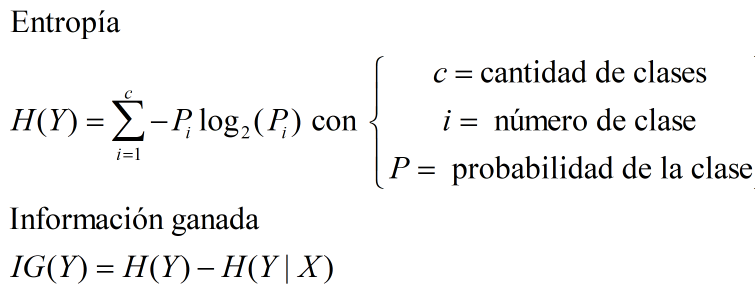

- La entropía va de 0 a 1 mayormente (pueden haber casos >1), siendo 0 el caso perfecto en el cual la información es clara y 1 o valores altos refiriendo a un gran nivel de desorden.
- A través de la "ramificación" del árbol, se intenta clarificar los grupos, dividiendolos por un criterio/condición, por ejemplo: "Valores <5". En este caso, todos los valores que cumplan esa condición irán a un grupo distinto de los que no lo cumplen. El algoritmo buscará todas las formas posibles y elegirá la que le permita obtener la mayor ganancia de información.
- Para visualizar dicha información ganada, utilizaremos la fórmula descripta anteriormente. Se buscará que el resultado de la formula sea el mayor número posible, ya que estaremos "ganando" mayor información.
- De todas formas, veremos a continuación un ejemplo práctico.

In [1]:
# Primero importamos las librerías a utilizar
import numpy as np
from math import log, e
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [2]:
# Creamos la función de entropía
def entropia(p=list,base=int):
    ent=0
    for i in p:
        ent-=i*log(i,base)
    return(ent)

In [3]:
## Importamos el dataset de ejemplo que se hizo a través de una función random en excel.
df=pd.read_excel(r"C:\Users\tobi_\OneDrive\Escritorio\PROYECTOS\ALGORITMOS\DECISION TREE PRUEBA.xlsx")

In [4]:
df

,objetivo_categórico,X1,X2
0,SI,8,3
1,SI,6,5
2,SI,4,1
3,SI,0,7
4,SI,2,2
5,NO,3,9
6,SI,6,4
7,SI,10,6
8,NO,7,2
9,NO,3,7


In [5]:
## Generamos el modelo y lo entrenamos.
## El modelo será lo mas simple posbile para poder entenderlo con mas facilidad

modelo=DecisionTreeClassifier(criterion="entropy",# el criterio para elegir sera "Entropía"
                             max_depth=1, # este parámetro hace referencia a la profundidad que puede tener un árbol
                             max_leaf_nodes=2) # la máxima cantidad de diversificaciones que tendrá cada nodo será de dos
modelo_entrenado=modelo.fit(df[["X1","X2"]],df["objetivo_categórico"])

[Text(167.4, 163.07999999999998, 'X[1] <= 8.0\nentropy = 0.881\nsamples = 10\nvalue = [3, 7]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.764\nsamples = 9\nvalue = [2, 7]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

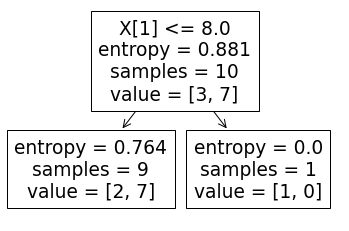

In [6]:
## Graficamos su camino para interpretar que fue lo que hizo.
tree.plot_tree(modelo_entrenado)

## Como podemos observar, el modelo utilizó la feature X2 para dividir entre dos grupos.

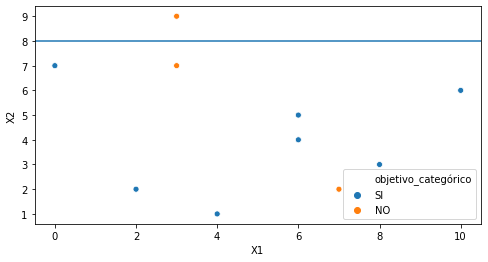

In [7]:
## Graficamos según la clasificación del modelo para tener otra forma de comprenderlo.
fig,ax=plt.subplots(figsize=(8,4))
sns.scatterplot(data=df,
                x="X1", y="X2",hue="objetivo_categórico",ax=ax)
ax.axhline(y=8)

In [8]:
## Ahora calculamos manualmente con la función creada la entropía y la ganancia de información.
cantidad=df["objetivo_categórico"].value_counts().to_numpy()
cantidad
probabilidad_padre=cantidad/(df["objetivo_categórico"].count())
probabilidad_padre
entropia_padre=entropia(probabilidad_padre,2)
entropia_padre

0.8812908992306927

In [9]:
nodo1=[1]
nodo2=[2/9,7/9]
entropia1=entropia(nodo1,2)
entropia2=entropia(nodo2,2)
print("Entropia 1",entropia1)
print("Entropia 2",entropia2)

Entropia 1 0.0
Entropia 2 0.7642045065086203


In [10]:
ydadox=entropia2*9/10
ganancia_informacion=entropia_padre-ydadox
print("Informacion ganada a través de la clasificacion",ganancia_informacion)

Informacion ganada a través de la clasificacion 0.19350684337293445


In [11]:
## Generamos el modelo y lo entrenamos.
## El modelo será lo mas simple posbile para poder entenderlo con mas facilidad

modelo=DecisionTreeClassifier(criterion="entropy",# el criterio para elegir sera "Entropía"
                             max_depth=3, # este parámetro hace referencia a la profundidad que puede tener un árbol
                             max_leaf_nodes=3) # la máxima cantidad de diversificaciones que tendrá cada nodo será de dos
modelo_entrenado=modelo.fit(df[["X1","X2"]],df["objetivo_categórico"])

[Text(200.88000000000002, 181.2, 'X[1] <= 8.0\nentropy = 0.881\nsamples = 10\nvalue = [3, 7]'),
 Text(133.92000000000002, 108.72, 'X[0] <= 2.5\nentropy = 0.764\nsamples = 9\nvalue = [2, 7]'),
 Text(66.96000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(200.88000000000002, 36.23999999999998, 'entropy = 0.863\nsamples = 7\nvalue = [2, 5]'),
 Text(267.84000000000003, 108.72, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

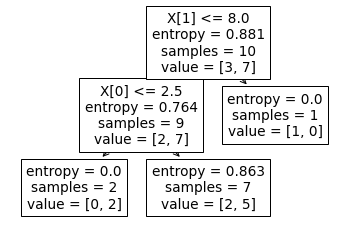

In [12]:
## Graficamos su camino para interpretar que fue lo que hizo.
tree.plot_tree(modelo_entrenado)

## Como podemos observar, el modelo utilizó la feature X2 para dividir entre dos grupos.

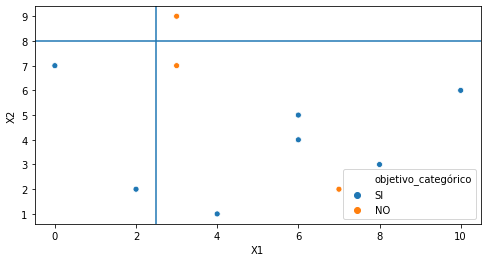

In [13]:
## Graficamos según la clasificación del modelo para tener otra forma de comprenderlo.
fig,ax=plt.subplots(figsize=(8,4))
sns.scatterplot(data=df,
                x="X1", y="X2",hue="objetivo_categórico",ax=ax)
ax.axhline(y=8)
ax.axvline(x=2.5)
## A primera vista, podemos ver que la ganancia de información es mayor aún.

### Conclusión
- Podemos observar que el primer modelo encontró que dividir a los grupos en valores de X2<8 maximizaba la ganancia de información.
- A su vez, debemos tener en cuenta los otros parámetros ya que si no elegimos correctamente podemos "overfitear" el modelo o perdernos ganancia de información.

In [14]:
## Caso de entropía mayor a 1
entropia([1/2,1/4,1/8,1/8],2)

1.75